# 1.0 - IMPORTS

## 1.1 - LIBRARIES

In [154]:
import pandas as pd
import numpy as np
import inflection
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1.2 - LOADING DATA

In [155]:
df_raw = pd.read_csv('../data/train.csv', low_memory=True)

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - OUTLIER VOLUMETRY

In [156]:
def outliers_volumetry(data):
    
    df_num = pd.DataFrame()
    df_num = data.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['id'].count())*100

    return df_outlier     

### 1.3.2 - PLOT DIMENSIONS

In [157]:
sns.set(rc = {'figure.figsize':(13,5)})

# 2.0 - DATA CLEANING

In [158]:
df2 = df_raw.copy()

## 2.1 - DATA DIMENSIONS

In [159]:
print('Number of Rows {}'.format(df2.shape[0]))
print('Number of Columns {}'.format(df2.shape[1]))
print('\nNumber of Unique Features:')
df2.apply(lambda x: x.nunique())

Number of Rows 513
Number of Columns 22

Number of Unique Features:


ID                                         20
EMPLOYEE                                   20
AGE                                        12
GENDER                                      2
STATUS                                      2
EMPLOYMENT TENURE                           7
EDUCATION DEGREE                            3
PROFESSION                                  7
DAY PERIOD                                  3
MODALITY                                    2
DATE                                       48
CALLS TAKEN                               366
INDIVIDUAL ORDER                          180
NETWORK ORDER                              73
INTERNET ORDER                            144
PHONE ORDER                                12
SLOW CONNECTION ORDER                      39
INSPECTION ORDER                           34
CHANGE TECNOLOGY ORDER                     21
EXCHANGE CUSTOMER EQUIPMENT ORDER COST      3
CHANGE CLIENT POWER ADAPTER ORDER COST     19
NO ACESS CLIENT ORDER COST        

## 2.2 - RENAME COLUMNS

For good practice and to improve usability in data manipulation, we will adopt the snake case pattern to transform the columns

In [160]:
df2.columns

Index(['ID', 'EMPLOYEE', 'AGE', 'GENDER', 'STATUS', 'EMPLOYMENT TENURE',
       'EDUCATION DEGREE', 'PROFESSION', 'DAY PERIOD', 'MODALITY', 'DATE',
       'CALLS TAKEN', 'INDIVIDUAL ORDER', 'NETWORK ORDER', 'INTERNET ORDER',
       'PHONE ORDER', 'SLOW CONNECTION ORDER', 'INSPECTION ORDER',
       'CHANGE TECNOLOGY ORDER', 'EXCHANGE CUSTOMER EQUIPMENT ORDER COST',
       'CHANGE CLIENT POWER ADAPTER ORDER COST', 'NO ACESS CLIENT ORDER COST'],
      dtype='object')

In [161]:
old_columns = df2.columns
new_columns = [inflection.underscore(col.replace(' ', '_')) for col in old_columns]
df2.columns = new_columns
print(new_columns)

['id', 'employee', 'age', 'gender', 'status', 'employment_tenure', 'education_degree', 'profession', 'day_period', 'modality', 'date', 'calls_taken', 'individual_order', 'network_order', 'internet_order', 'phone_order', 'slow_connection_order', 'inspection_order', 'change_tecnology_order', 'exchange_customer_equipment_order_cost', 'change_client_power_adapter_order_cost', 'no_acess_client_order_cost']


## 2.3 - DATA TYPES

Check whether the types of variables remain within the standard of their nature

In [162]:
df2.dtypes

id                                         int64
employee                                  object
age                                        int64
gender                                    object
status                                    object
employment_tenure                         object
education_degree                          object
profession                                object
day_period                                object
modality                                  object
date                                      object
calls_taken                                int64
individual_order                           int64
network_order                              int64
internet_order                             int64
phone_order                                int64
slow_connection_order                      int64
inspection_order                           int64
change_tecnology_order                     int64
exchange_customer_equipment_order_cost     int64
change_client_power_

We can see that the date is not in the correct format. Then the transformation will be applied to its appropriate type

In [163]:
df2['date'] = pd.to_datetime(df2['date'])
df2['date']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
508   2020-01-08
509   2020-01-09
510   2020-01-10
511   2020-01-11
512   2020-01-12
Name: date, Length: 513, dtype: datetime64[ns]

The date was in a non-standard format (Day and Month in a different order), so we applied a function to order month and day

In [164]:
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

# Lambda function to reverse the day and month
invert = lambda x: x.replace(day = x.month, month = x.day)

# Apply lambda function to 'date' column
df2['date'] = df2['date'].apply(invert)

# If you want, you can convert it back to a string in the format 'YYYY-MM-DD'
df2['date'] = df2['date'].dt.strftime('%Y-%m-%d')

#Converting back to datetime format
df2['date'] = pd.to_datetime(df2['date'])

print(df2['date'])

0     2023-01-01
1     2023-02-01
2     2023-03-01
3     2023-04-01
4     2023-05-01
         ...    
508   2020-08-01
509   2020-09-01
510   2020-10-01
511   2020-11-01
512   2020-12-01
Name: date, Length: 513, dtype: datetime64[ns]


## 2.4 - DATA VOLUMETRY

### 2.4.1 - NA VOLUMETRY

In [165]:
df2.isna().sum()

id                                        0
employee                                  0
age                                       0
gender                                    0
status                                    0
employment_tenure                         0
education_degree                          0
profession                                0
day_period                                0
modality                                  0
date                                      0
calls_taken                               0
individual_order                          0
network_order                             0
internet_order                            0
phone_order                               0
slow_connection_order                     0
inspection_order                          0
change_tecnology_order                    0
exchange_customer_equipment_order_cost    0
change_client_power_adapter_order_cost    0
no_acess_client_order_cost                0
dtype: int64

### 2.4.2 - NULL VOLUMETRY

In [166]:
df2.isnull().sum()

id                                        0
employee                                  0
age                                       0
gender                                    0
status                                    0
employment_tenure                         0
education_degree                          0
profession                                0
day_period                                0
modality                                  0
date                                      0
calls_taken                               0
individual_order                          0
network_order                             0
internet_order                            0
phone_order                               0
slow_connection_order                     0
inspection_order                          0
change_tecnology_order                    0
exchange_customer_equipment_order_cost    0
change_client_power_adapter_order_cost    0
no_acess_client_order_cost                0
dtype: int64

### 2.4.3 - DUPLICATE VOLUMETRY

In [167]:
duplicated_rows = df2[df2.duplicated()]
print('Number of Duplicated Rows: {}'.format(duplicated_rows.shape[0]))

Number of Duplicated Rows: 0


### 2.4.4 - NA VOLUMETRY

Let's plot a boxplot for each feature to determine the quartiles where outliers are concentrated.

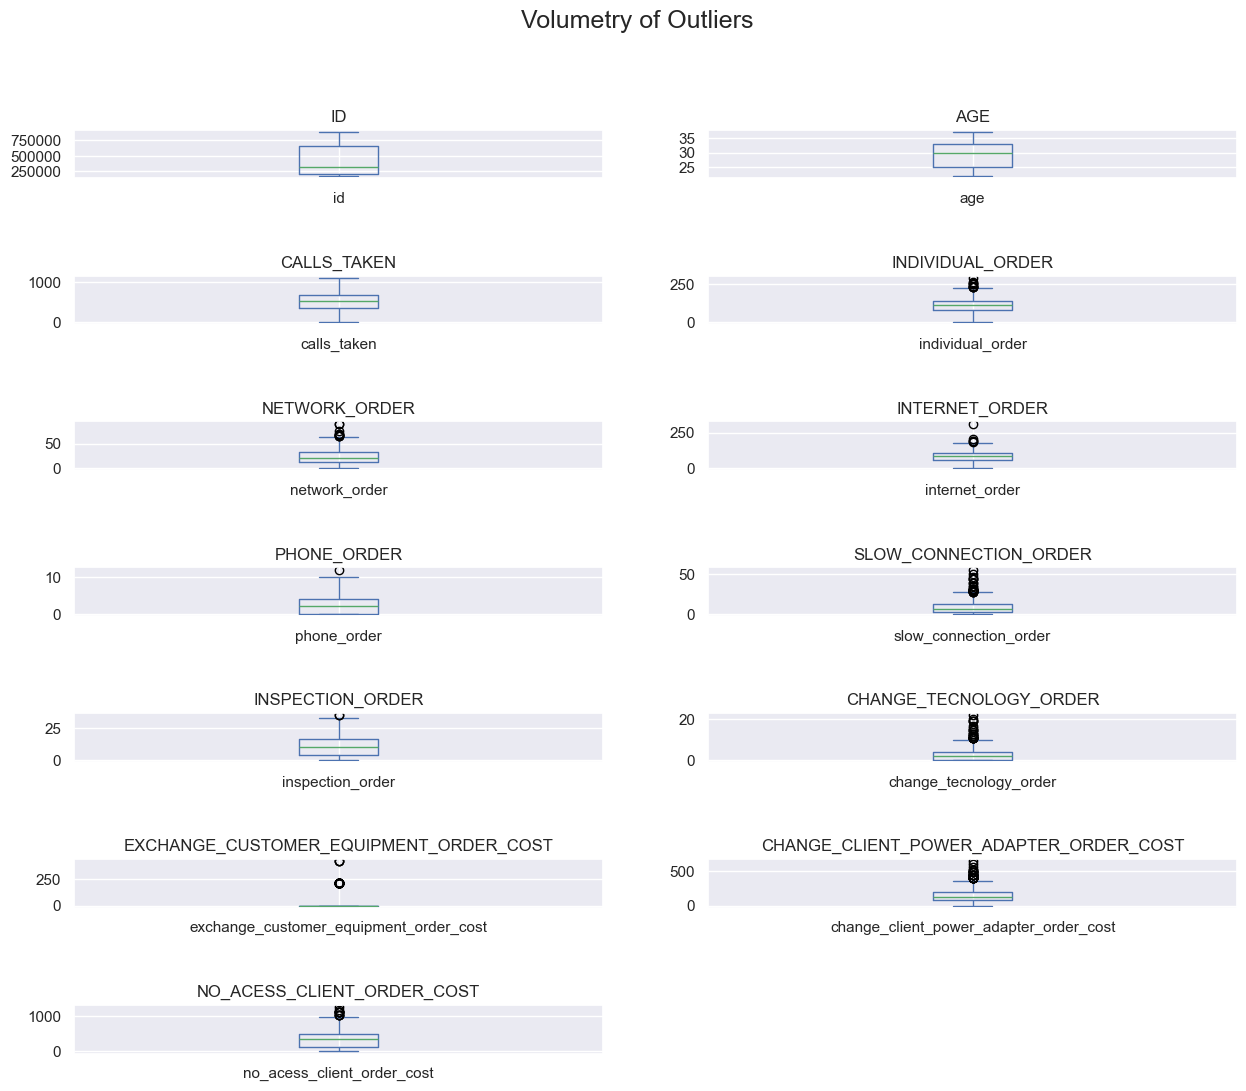

In [168]:
df_numerical = df2.select_dtypes(exclude = ('object','datetime64'))

# Creating the subplots for the dashbord of the boxplot

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace = 2)
plt.suptitle("Volumetry of Outliers", fontsize=18)

# loop through the length of pointer and keep track of index
for n, pointer in enumerate(df_numerical.columns):
    
    # add a new subplot iteratively
    ax = plt.subplot(7, 2, n + 1)

    # create a boxplot for the pointer on the new subplot axis
    df_numerical[pointer].plot(kind='box', ax=ax)

    # chart formatting
    ax.set_title(pointer.upper())
    ax.set_xlabel("")

plt.show()

In addition to the percentage of outliers representing a small volume in the data, we will maintain it as it makes sense for the business

In [169]:
outliers_volumetry(df_numerical)

,attributes,quantity,percentual
0,id,0,0.000000
1,age,0,0.000000
2,calls_taken,0,0.000000
3,individual_order,10,1.949318
4,network_order,10,1.949318
5,internet_order,5,0.974659
6,phone_order,1,0.194932
7,slow_connection_order,25,4.873294
8,inspection_order,2,0.389864
9,change_tecnology_order,26,5.068226


# 3.0 - DESCRIPTIVE STATISTICS

In [170]:
df3 = df2.copy()

In [171]:
df2_num = pd.DataFrame()
df2_cat = pd.DataFrame()

df2_num = df3.select_dtypes(exclude = ('object', 'datetime'))
df2_cat = df3.select_dtypes(include = 'object')

Tracking the dataset into numerical and categorical features:


In [172]:
# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(df2_num.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(df2_num.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(df2_num.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(df2_num.apply(min)).T
dispersion3 = pd.DataFrame(df2_num.apply(max)).T
dispersion4 = pd.DataFrame(df2_num.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(df2_num.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(df2_num.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,id,410995.514620,319752.0,236339.136490,171001.0,888975.0,-717974.0,0.580406,-1.143698
1,age,29.204678,30.0,4.314062,22.0,37.0,-15.0,-0.341042,-1.019718
2,calls_taken,485.966862,514.0,257.394602,0.0,1103.0,-1103.0,-0.323508,-0.509225
3,individual_order,105.044834,112.0,56.753665,0.0,290.0,-290.0,-0.142849,-0.113552
4,network_order,23.633528,20.0,16.249223,0.0,91.0,-91.0,0.966433,0.871859
5,internet_order,77.775828,82.0,43.299564,0.0,313.0,-313.0,0.132526,1.135569
6,phone_order,2.382066,2.0,2.289528,0.0,12.0,-12.0,1.109523,1.061139
7,slow_connection_order,8.633528,6.0,8.864928,0.0,56.0,-56.0,1.742932,4.092123
8,inspection_order,10.830409,10.0,7.995643,0.0,35.0,-35.0,0.525440,-0.317551
9,change_tecnology_order,2.900585,2.0,3.628437,0.0,22.0,-22.0,2.036950,5.130331


# 4.0 - FEATURE ENGINEERING

In [173]:
df4 = df3.copy()

In [174]:
df4.sample(10).T

,331,183,303,363,103,128,477,173,213,483
id,171182,212121,888975,444881,258519,177771,171001,333335,672332,171001
employee,Z. Paula,F. Pastana,J. Petter,F. Santhiago,H. Judice,G. Rocha,J. Marcel,T. Oliveira,M. Vinicius,J. Marcel
age,23,22,33,35,26,32,30,22,31,30
gender,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male
status,Inactive,Inactive,Inactive,Active,Active,Inactive,Inactive,Active,Inactive,Inactive
employment_tenure,2 Years,2 Years,6 Years,2 Years,5 Months,3 Years,5 Years,1 Year,3 Years,5 Years
education_degree,High School,High School,Undergraduate Degree,High School,High School,High School,High School,University Student,Undergraduate Degree,High School
profession,Technical Support,Technical Support,IT Management,Technical Support,Technical Support,Technical Support,Technical Support,Technical Support,Information Systems Analyst,Technical Support
day_period,Day Shift,Night Shift,Day Shift,Night Shift,Night Shift,Night Shift,Day Shift,Day Shift,Night Shift,Night Shift
modality,In Person Work,In Person Work,In Person Work,In Person Work,In Person Work,Remote Work,In Person Work,In Person Work,Remote Work,In Person Work


Creating a new feature to measure the performance of each technical attendant based on the number of open calls and incidents

In [175]:
df4['performance'] = df4.apply(lambda x: abs(((x['individual_order'] + x['network_order'])/x['calls_taken']) - 1.0) if x['calls_taken'] != 0 else 0, axis = 1)
df4['performance'] = np.round(df4['performance'], 3)

Creating a feature for the number of occurrences for changing Router or ONU. The value of this unit occurrence is 210

In [176]:
df4['customer_equipment'] = df4.apply(lambda x: x['exchange_customer_equipment_order_cost']/210 if x['exchange_customer_equipment_order_cost'] != 0 else 0, axis = 1)
df4['customer_equipment'] = df4['customer_equipment'].astype(np.int64)

Creating a feature for the number of occurrences for changing the general power supply. The value of this unit occurrence is 40

In [177]:
df4['power_adapter_order'] = df4.apply(lambda x: x['change_client_power_adapter_order_cost']/40 if x['change_client_power_adapter_order_cost'] != 0 else 0, axis = 1)
df4['power_adapter_order'] = df4['power_adapter_order'].astype(np.int64)

Creating a feature for the number of failures occurring on the part of particular devices or customer dependencies. The value of this unit occurrence is 70

In [178]:
df4['no_acess_client_order'] = df4.apply(lambda x: x['no_acess_client_order_cost']/70 if x['no_acess_client_order_cost'] != 0 else 0, axis = 1)
df4['no_acess_client_order'] = df4['no_acess_client_order'].astype(np.int64)

# 5.0 - EXPLORATORY DATA ANALYSIS (EDA)